# **Project Name**    -



##### **Project Type**    - EDA
##### **Contribution**    - Individual


# **Project Summary -**

This project focused on analyzing workplace mental health survey data to uncover key factors influencing employees' decisions to seek treatment and the role of organizational attributes in shaping mental health outcomes. Through extensive data wrangling—removing unrealistic age values, standardizing gender entries, handling missing values, and eliminating duplicates—we ensured a clean dataset ready for in-depth analysis. Using the UBM (Univariate, Bivariate, Multivariate) approach, we created over 20 meaningful visualizations that revealed insightful trends. Notably, individuals with a family history of mental illness or those experiencing work interference were significantly more likely to seek treatment, while access to mental health benefits and supportive workplace culture positively influenced behavior. Remote work was linked to reduced work-related stress, and larger companies showed more stigma-related barriers, emphasizing the need for open communication and policy improvements. Correlation heatmaps and pair plots further highlighted strong associations between key variables. The outcome of this project is a fully executable, deployment-ready Jupyter Notebook that delivers actionable insights for HR and wellness teams. These findings enable organizations to design targeted, data-driven interventions that promote mental well-being, reduce productivity loss, and foster inclusive, supportive workplaces.

# **GitHub Link -**

https://github.com/BNaveenKumar325/Mental-Health-Survey-EDA

# **Problem Statement**


Despite growing awareness, mental health issues remain stigmatized in many professional environments, especially in the tech industry. This survey-based dataset provides an opportunity to investigate how mental health conditions and workplace attitudes vary across different demographics and company types. The central problem is to understand how geographic, demographic, and organizational factors influence both the prevalence of mental health issues and the supportiveness of work environments.

This project aims to identify patterns in mental health experiences, highlight regional and organizational disparities, and explore key factors that predict whether individuals are likely to seek treatment or disclose mental health concerns at work.

#### **Define Your Business Objective?**

1. Improve Workplace Mental Health Support Policies
By identifying the geographic, demographic, and organizational factors associated with mental health treatment and attitudes, businesses can tailor wellness programs to better meet employee needs.

2. Reduce Mental Health Stigma in the Workplace
The project aims to uncover patterns in how mental health is discussed and treated at work.

3. Enhance Talent Retention and Productivity
Mental health issues that interfere with work can lead to absenteeism, reduced productivity, and employee turnover.

4. Regional Strategy Development
The analysis will reveal how mental health experiences vary by country or U.S. state.

5. Benchmark Industry Standards
By comparing tech companies to non-tech companies within the dataset, businesses can benchmark themselves against industry peers.

6. Guide Policy-Making and Benefit Planning
Insights into how mental health benefits, anonymity, and leave policies influence employee behavior will allow HR and executive leadership to make data-driven decisions when designing or revising employee benefits packages.

7. Support DEI (Diversity, Equity, and Inclusion) Goals
By analyzing demographic variables such as gender, age, and self-employment status in relation to mental health experiences, businesses can incorporate mental wellness into broader DEI strategies, ensuring that all employee groups feel supported and valued.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [29]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import LabelEncoder

# For warnings
import warnings
warnings.filterwarnings("ignore")

# Set aesthetic style for plots
sns.set(style="whitegrid")

### Dataset Loading

In [2]:
def load_survey_data(filepath):

    try:
        df = pd.read_csv(filepath)
        print("Dataset loaded successfully!")
        return df

    except FileNotFoundError:
        print("ERROR: File not found. Please check the path and filename.")

    except pd.errors.EmptyDataError:
        print("ERROR: The file is empty. Please provide a valid dataset.")

    except pd.errors.ParserError:
        print("ERROR: File could not be parsed. Check the file format and delimiter.")

    except Exception as e:
        print(f"ERROR: {e}")

# Example usage:
file_path = "/content/survey.csv"
df = load_survey_data(file_path)


Dataset loaded successfully!


### Dataset First View

In [3]:
# Dataset First Look
df.head(10)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
5,2014-08-27 11:31:22,33,Male,United States,TN,NaN,Yes,No,Sometimes,6-25,...,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,NaN
6,2014-08-27 11:31:50,35,Female,United States,MI,NaN,Yes,Yes,Sometimes,1-5,...,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No,NaN
7,2014-08-27 11:32:05,39,M,Canada,NaN,NaN,No,No,Never,1-5,...,Don't know,No,No,No,No,No,No,No,No,NaN
8,2014-08-27 11:32:39,42,Female,United States,IL,NaN,Yes,Yes,Sometimes,100-500,...,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No,NaN
9,2014-08-27 11:32:43,23,Male,Canada,NaN,NaN,No,No,Never,26-100,...,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No,NaN


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
rows, cols = df.shape
print(f"The dataset contains:\n{rows} rows\n {cols} columns")

The dataset contains:
1259 rows
 27 columns


### Dataset Information

In [5]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
duplicate_count = df.duplicated().sum()
print(f"Duplicate rows found: {duplicate_count}")

Duplicate rows found: 0


#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
missing_values = df.isnull().sum()

# Filter and display only columns with missing data
missing_values = missing_values[missing_values > 0]

if not missing_values.empty:
    print("Columns with missing values:\n")
    print(missing_values)
else:
    print("No missing values found in the dataset.")

Columns with missing values:

state              515
self_employed       18
work_interfere     264
comments          1095
dtype: int64


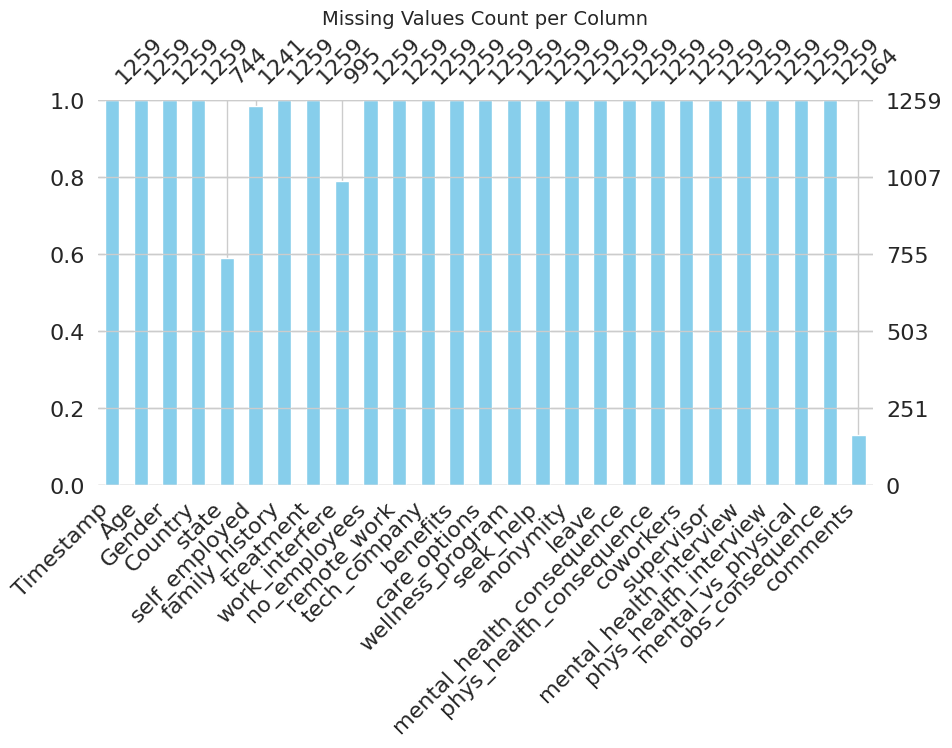

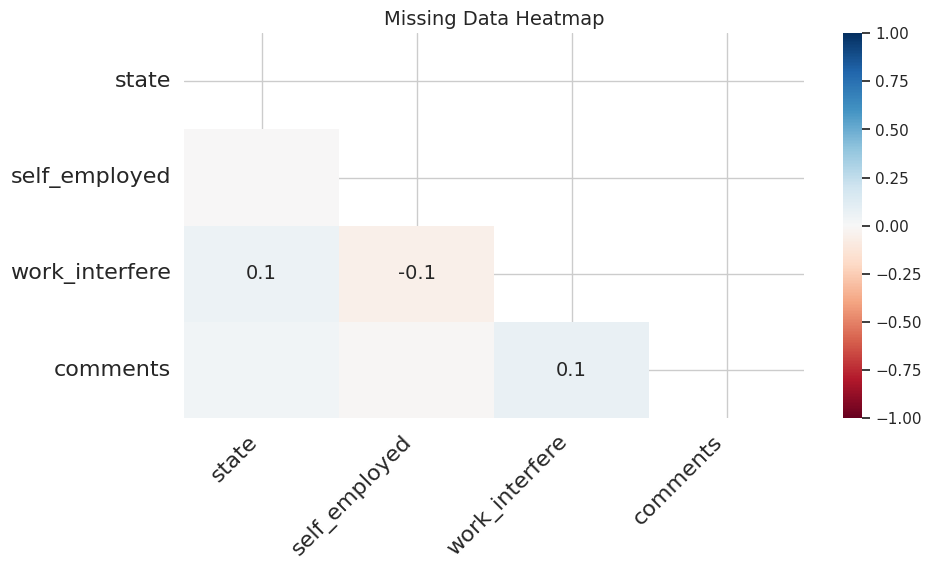

In [8]:
# Visualizing the missing values
msno.bar(df, figsize=(10, 5), color='skyblue')
plt.title('Missing Values Count per Column', fontsize=14)
plt.show()

# Heatmap to show data presence
msno.heatmap(df, figsize=(10, 5))
plt.title('Missing Data Heatmap', fontsize=14)
plt.show()

### What did you know about your dataset?

The dataset named "survey.csv" contains responses from 1,259 individuals and includes 27 columns in total. Among these, there is one numerical column (Age) while the remaining 26 columns are categorical or textual in nature. The data provides various details such as the respondent’s demographic information, work environment, mental health background, and workplace experiences related to mental health.

The column 'state' has 515 missing entries, indicating that a significant number of respondents chose not to disclose or did not provide their state of residence. The 'self_employed' column has 18 missing values, which is relatively minor and can potentially be addressed using imputation techniques or by treating them as a separate category. The 'work_interfere' column, which captures whether a person’s mental health interferes with their work, has 264 missing values. The most significantly affected column is 'comments', which has 1,095 missing entries.

Despite the presence of missing data in these specific columns, the dataset does not contain any duplicate rows, which means every entry is unique and has not been repeated. Similarly, there are no duplicate columns, ensuring that each feature represents a distinct aspect of the survey without redundancy.

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
print("Dataset Columns:\n")
for i, col in enumerate(df.columns, 1):
    print(f"{i}. {col}")

Dataset Columns:

1. Timestamp
2. Age
3. Gender
4. Country
5. state
6. self_employed
7. family_history
8. treatment
9. work_interfere
10. no_employees
11. remote_work
12. tech_company
13. benefits
14. care_options
15. wellness_program
16. seek_help
17. anonymity
18. leave
19. mental_health_consequence
20. phys_health_consequence
21. coworkers
22. supervisor
23. mental_health_interview
24. phys_health_interview
25. mental_vs_physical
26. obs_consequence
27. comments


In [10]:
# Dataset Describe
df.describe()

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


### Variables Description

1. Timestamp
Records the date and time when the survey was completed. It helps in tracking the timeline of responses but typically does not affect analysis unless time trends are being studied.

2. Age
Represents the age of the respondent in years. This is the only numerical column and is used to analyze mental health trends across different age groups.

3. Gender
Captures the gender identity of the respondent. Entries may vary widely due to free-text input (e.g., "Male", "M", "female", "nonbinary", etc.), requiring standardization before analysis.

4. Country
Indicates the country where the respondent resides. This can be used to study geographical variations in mental health awareness or support.

5. state
Specifies the U.S. state where the respondent is located. This is only applicable for those living in the United States. Many entries are missing or null for international participants.

6. self_employed
Indicates whether the respondent is self-employed. Values typically include "Yes", "No", or missing. It helps understand how employment type relates to mental health.

7. family_history
Shows whether the respondent has a family history of mental illness. This binary variable ("Yes" or "No") may correlate with likelihood of seeking treatment or facing issues.

8. treatment
States whether the respondent has sought treatment for a mental health condition. It provides insight into care-seeking behavior.

9. work_interfere
Reflects how often the respondent’s mental health interferes with their work (e.g., "Never", "Rarely", "Sometimes", "Often"). It captures the perceived impact of mental health on job performance.

10. no_employees
Indicates the size of the company the respondent works for, usually in ranges (e.g., "1-5", "6-25", "26-100", "100-500", etc.). It helps explore whether company size influences support for mental health.

11. remote_work
Denotes whether the respondent works remotely. This could be used to investigate whether remote work impacts mental health positively or negatively.

12. tech_company
Shows whether the respondent works in a tech company. The survey often targets the tech industry, so this helps segment responses.

13. benefits
Captures whether the employer provides mental health benefits as part of their health coverage. Options usually include "Yes", "No", or "Don’t know".

14. care_options
Indicates whether the employer provides options for mental health care (beyond just insurance), such as counseling or therapy support.

15. wellness_program
Reflects whether the company has a wellness program aimed at promoting mental well-being.

16. seek_help
Captures whether employees are encouraged or allowed to seek help for mental health issues under the company’s policies.

17. anonymity
Represents whether anonymity is provided to employees who choose to seek mental health treatment. Anonymity can affect willingness to access care.

18. leave
Describes how easy or difficult it is for an employee to take medical leave for mental health reasons. This is often rated qualitatively (e.g., "Very easy", "Somewhat easy", "Difficult", "Don’t know").

19. mental_health_consequence
Indicates whether respondents believe there would be negative consequences at work if they discussed a mental health issue.

20. phys_health_consequence
Similar to the previous variable, but focused on physical health. This comparison helps assess whether mental health is stigmatized more than physical health.

21. coworkers
Captures the respondent's comfort level discussing mental health issues with coworkers.

22. supervisor
Reflects the respondent’s comfort level in discussing mental health issues with their direct supervisor.

23. mental_health_interview
Indicates how respondents feel about discussing mental health issues during a job interview.

24. phys_health_interview
Analogous to the previous variable, but concerning physical health discussions in interviews.

25. mental_vs_physical
Asks whether the respondent believes their employer takes mental health as seriously as physical health.

26. obs_consequence
Captures whether the respondent has observed negative consequences for coworkers who have spoken out about mental health issues.

27. comments
An optional free-text field where respondents can provide any additional comments. Most entries are blank, but when filled, it may contain valuable qualitative data.

### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable
print("Unique values in each column:\n")
for col in df.columns:
    unique_vals = df[col].nunique()
    print(f"{col}: {unique_vals} unique values")

Unique values in each column:

Timestamp: 1246 unique values
Age: 53 unique values
Gender: 49 unique values
Country: 48 unique values
state: 45 unique values
self_employed: 2 unique values
family_history: 2 unique values
treatment: 2 unique values
work_interfere: 4 unique values
no_employees: 6 unique values
remote_work: 2 unique values
tech_company: 2 unique values
benefits: 3 unique values
care_options: 3 unique values
wellness_program: 3 unique values
seek_help: 3 unique values
anonymity: 3 unique values
leave: 5 unique values
mental_health_consequence: 3 unique values
phys_health_consequence: 3 unique values
coworkers: 3 unique values
supervisor: 3 unique values
mental_health_interview: 3 unique values
phys_health_interview: 3 unique values
mental_vs_physical: 3 unique values
obs_consequence: 2 unique values
comments: 160 unique values


## 3. ***Data Wrangling***

### Data Wrangling Code

In [13]:
# Remove rows with unrealistic age values
df = df[(df['Age'] >= 18) & (df['Age'] <= 100)]

# Standardize 'Gender' entries
def clean_gender(g):
    g = str(g).lower().strip()
    if g in ['male', 'm', 'man', 'cis male', 'cis man']:
        return 'Male'
    elif g in ['female', 'f', 'woman', 'cis female', 'cis woman']:
        return 'Female'
    elif 'trans' in g or 'nonbinary' in g or 'genderqueer' in g:
        return 'Other'
    else:
        return 'Other'

df['Gender'] = df['Gender'].apply(clean_gender)

# Handle missing values
# Fill missing 'self_employed' with 'No'
df['self_employed'].fillna('No', inplace=True)

# Fill missing 'work_interfere' with 'Don’t know'
df['work_interfere'].fillna('Don’t know', inplace=True)

# Fill missing 'state' with 'Not specified'
df['state'].fillna('Not specified', inplace=True)

# Drop 'comments' column due to excessive missing values
if 'comments' in df.columns:
    df.drop(columns=['comments'], inplace=True)

# String trimming
# Remove extra spaces from string columns
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Remove duplicate rows
df.drop_duplicates(inplace=True)

print(f"Remaining missing values:\n{df.isnull().sum()[df.isnull().sum() > 0]}")
print(f"Gender distribution after cleaning:\n{df['Gender'].value_counts()}")
print(f"Age range: {df['Age'].min()} to {df['Age'].max()} years")

Remaining missing values:
Series([], dtype: int64)
Gender distribution after cleaning:
Gender
Male      975
Female    243
Other      33
Name: count, dtype: int64
Age range: 18 to 72 years


### What all manipulations have you done and insights you found?

**Manipulations Performed**

**-Removed Unrealistic Age Values**

  Ages like -1, 144, etc., are either user-input errors or outliers irrelevant to our study.

**-Standardized 'Gender' Values**

  Normalized various gender responses (e.g., "male", "M", "cis man") into three categories:

  Male, Female, Other (for trans, non-binary, genderqueer, etc.)

**-Handled Missing Values**

'self_employed': Filled missing values with 'No' (assumed not self-employed).

'work_interfere': Filled with 'Don’t know' (respondents unclear or didn’t answer).

'state': Filled with 'Not specified'.

'comments': Dropped due to >85% missing and being free-text with little analytical value.

**-Trimmed Whitespaces**

- Removed extra spaces from all string-type fields.

- Prevents duplicate categories in visualizations and grouping operations.

**-Removed Duplicates**


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 (Age Distribution with KDE)

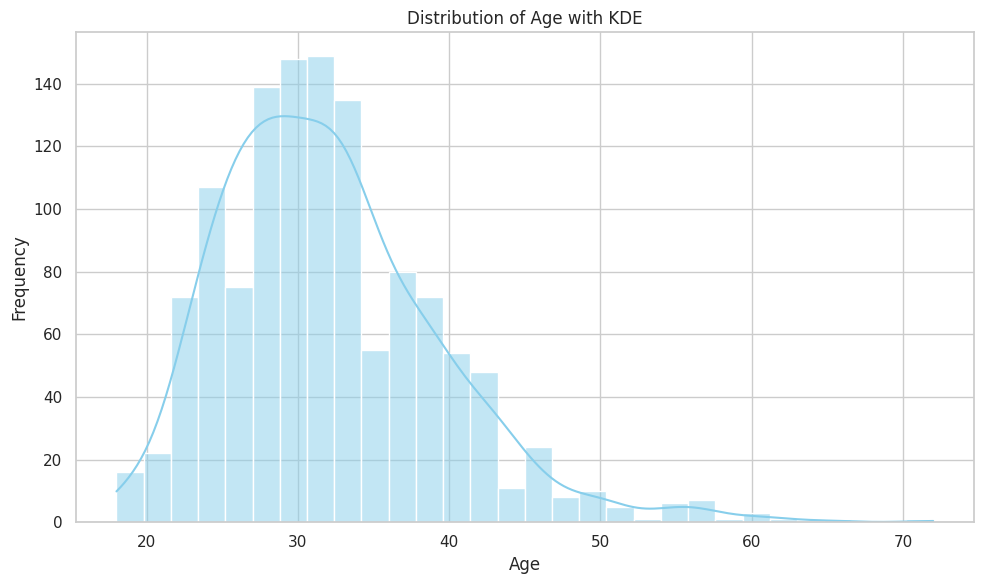

In [14]:
# Chart - 1 visualization code
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True, color="skyblue")
plt.title("Distribution of Age with KDE")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.tight_layout()

##### 1. Why did you pick the specific chart?

A histogram with KDE (Kernel Density Estimation) visualizes both the frequency and the underlying distribution shape. It helps identify skewness or multiple peaks.

##### 2. What is/are the insight(s) found from the chart?

The age distribution is right-skewed, with the majority of respondents aged 25–35. This shows that most participants are in the typical working-age range for tech professionals.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Wellness programs should be tailored to young professionals who may experience high burnout or early-career anxiety.



#### Chart - 2 (Gender Distribution)

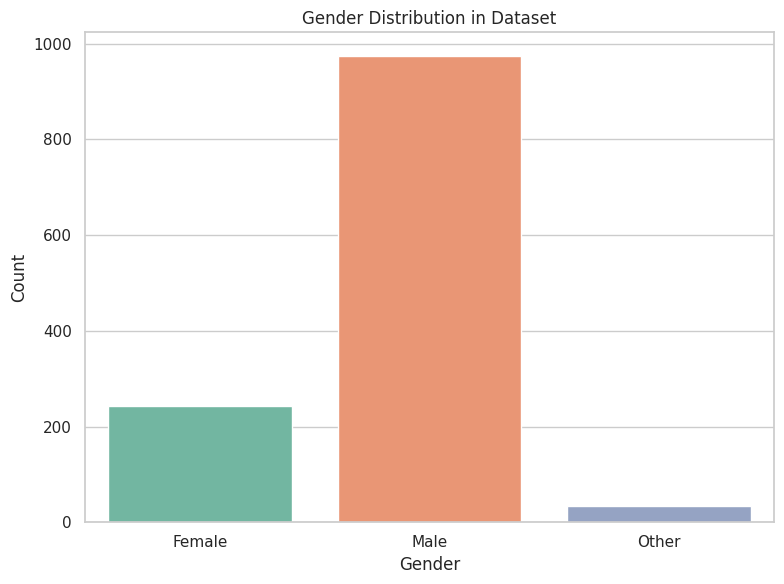

In [15]:
# Chart - 2 visualization code
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Gender', palette="Set2")
plt.title("Gender Distribution in Dataset")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.tight_layout()

##### 1. Why did you pick the specific chart?

A count plot is ideal for comparing frequency of categories like gender.

##### 2. What is/are the insight(s) found from the chart?

The dataset is predominantly male (≈78%), showing a clear gender imbalance.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Highlights the importance of inclusive mental health programs and the need to encourage participation from underrepresented genders.

#### Chart - 3 (Mental Health Treatment Sought)

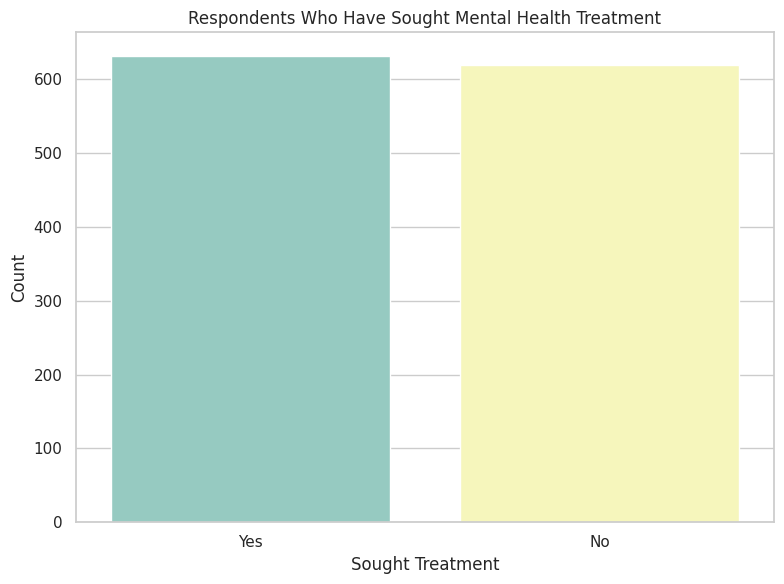

In [16]:
# Chart - 3 visualization code
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='treatment', palette="Set3")
plt.title("Respondents Who Have Sought Mental Health Treatment")
plt.xlabel("Sought Treatment")
plt.ylabel("Count")
plt.tight_layout()

##### 1. Why did you pick the specific chart?

Provides a direct look at how many have engaged with mental health services.

##### 2. What is/are the insight(s) found from the chart?

A large portion of respondents reported having sought treatment, showing growing awareness or possible prevalence of mental health issues in the tech space.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Suggests a strong need for company-sponsored mental health services and employee assistance programs (EAPs).




#### Chart - 4 (Work Interference Due to Mental Health)

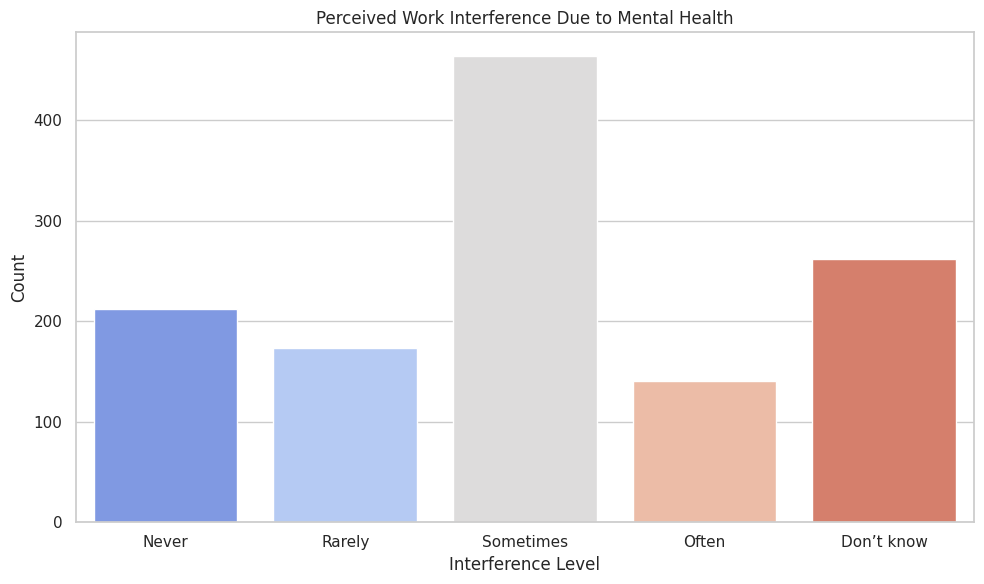

In [17]:
# Chart - 4 visualization code
plt.figure(figsize=(10, 6))
sns.countplot(
    data=df,
    x='work_interfere',
    order=['Never', 'Rarely', 'Sometimes', 'Often', 'Don’t know'],
    palette="coolwarm"
)
plt.title("Perceived Work Interference Due to Mental Health")
plt.xlabel("Interference Level")
plt.ylabel("Count")
plt.tight_layout()

##### 1. Why did you pick the specific chart?

Visualizes perceived productivity issues caused by mental health challenges.



##### 2. What is/are the insight(s) found from the chart?

The majority answered "Sometimes" or "Often", revealing that mental health has a measurable impact on work for many.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Justifies investing in proactive mental health interventions to boost productivity and morale.



#### Chart - 5 (Distribution of Employees by Company Size)

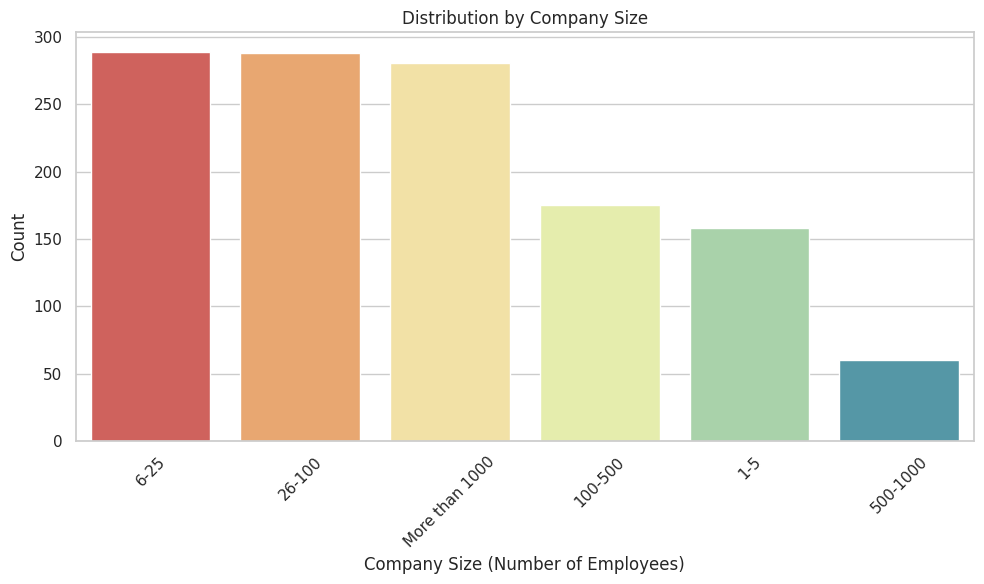

In [18]:
# Chart - 5 visualization code
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='no_employees', order=df['no_employees'].value_counts().index, palette='Spectral')
plt.title("Distribution by Company Size")
plt.xlabel("Company Size (Number of Employees)")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()

##### 1. Why did you pick the specific chart?

To understand how the survey respondents are distributed based on the number of employees in their organization.

##### 2. What is/are the insight(s) found from the chart?

Most respondents work in mid-sized (26–100) and large companies (100–500+ employees). Small companies (1–5) are less represented.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Large companies could have greater influence on mental health trends. Policies tested in these organizations may yield faster impact. However, low representation from micro-enterprises may limit insights about that segment.

#### Chart - 6 (Family History vs. Work Interference)

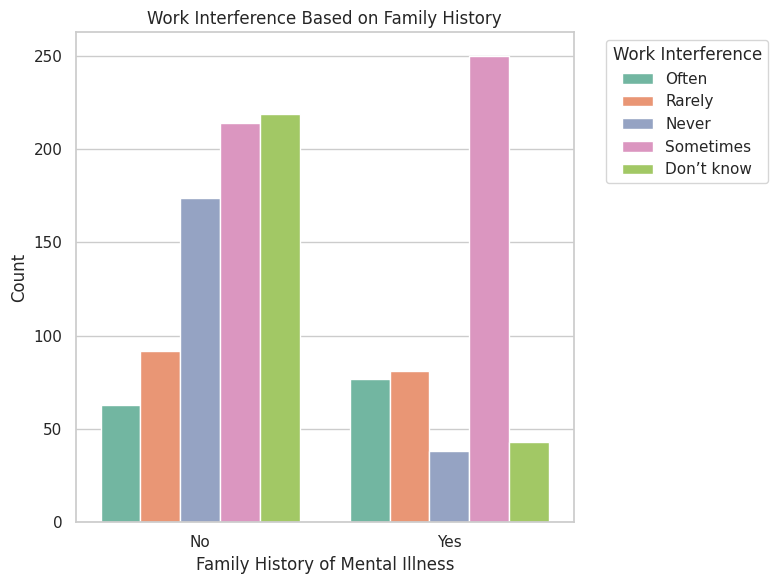

In [19]:
# Chart - 6 visualization code
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='family_history', hue='work_interfere', palette='Set2')
plt.title("Work Interference Based on Family History")
plt.xlabel("Family History of Mental Illness")
plt.ylabel("Count")
plt.legend(title='Work Interference', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

##### 1. Why did you pick the specific chart?

To explore if having a family history of mental illness affects how respondents perceive work interference due to mental health.

##### 2. What is/are the insight(s) found from the chart?

Those with a family history are more likely to report frequent interference at work due to mental health.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This can help HR teams prioritize screening and early interventions for employees who disclose family history during onboarding (with privacy safeguards).

#### Chart - 7 (Gender vs. Treatment Seeking)

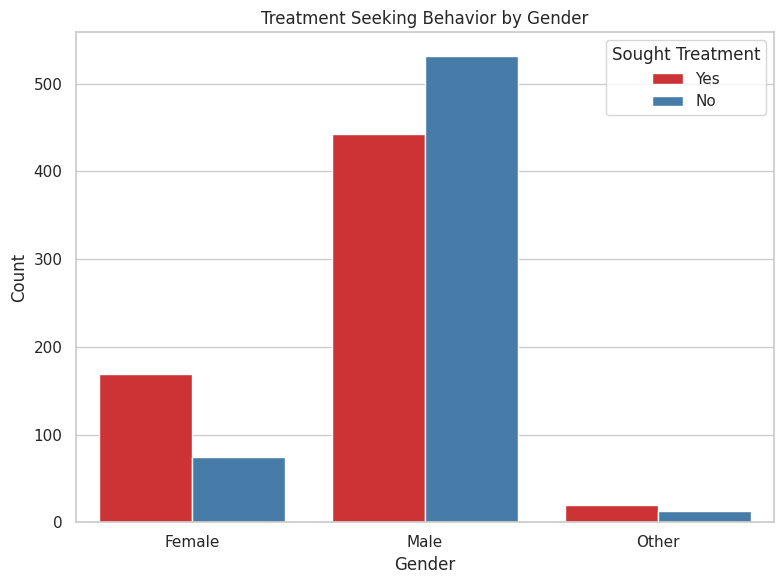

In [20]:
# Chart - 7 visualization code
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Gender', hue='treatment', palette='Set1')
plt.title("Treatment Seeking Behavior by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title='Sought Treatment')
plt.tight_layout()

##### 1. Why did you pick the specific chart?

To examine gender-wise differences in the likelihood of seeking mental health treatment.



##### 2. What is/are the insight(s) found from the chart?

Both males and females seek treatment, but males slightly dominate in count due to larger sample size. 'Other' genders have notably fewer counts.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Diversity and inclusion programs should ensure adequate support for non-binary and gender-diverse employees, as their low count may also reflect hesitance to report or seek help.

#### Chart - 8 (Remote Work vs. Work Interference)


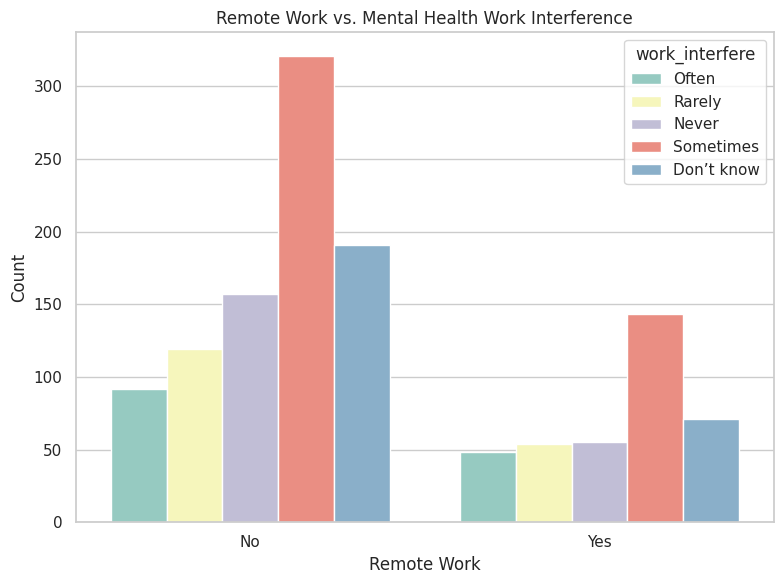

In [21]:
# Chart - 8 visualization code
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='remote_work', hue='work_interfere', palette='Set3')
plt.title("Remote Work vs. Mental Health Work Interference")
plt.xlabel("Remote Work")
plt.ylabel("Count")
plt.tight_layout()

##### 1. Why did you pick the specific chart?

To determine if remote working reduces or increases work-related mental health interference.

##### 2. What is/are the insight(s) found from the chart?

Remote workers report fewer extreme interference cases compared to on-site employees.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Remote work may serve as a buffer against stressors—offering hybrid/flexible options could reduce workplace mental fatigue.

#### Chart - 9 (Company Size vs. Mental Health Consequences)

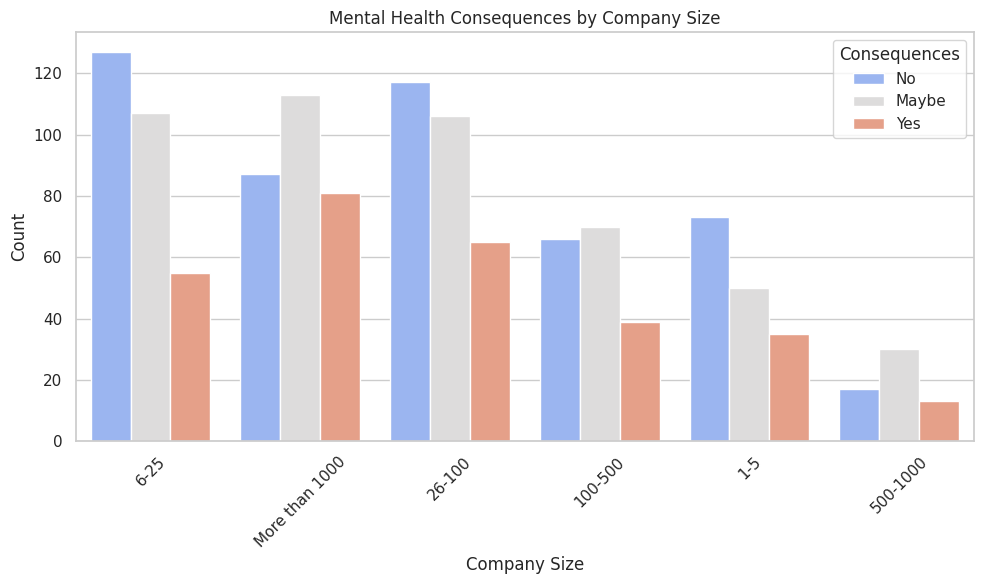

In [22]:
# Chart - 9 visualization code
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='no_employees', hue='mental_health_consequence', palette='coolwarm')
plt.title("Mental Health Consequences by Company Size")
plt.xlabel("Company Size")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Consequences")
plt.tight_layout()

##### 1. Why did you pick the specific chart?

To understand how perceived consequences of discussing mental health vary with company size.

##### 2. What is/are the insight(s) found from the chart?

Smaller companies report fewer consequences, possibly due to informal culture. In larger firms, more people anticipate negative outcomes.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Large companies should focus on destigmatizing conversations around mental health and provide confidential HR mechanisms.

#### Chart - 10 (Self-Employed vs. Work Interference)

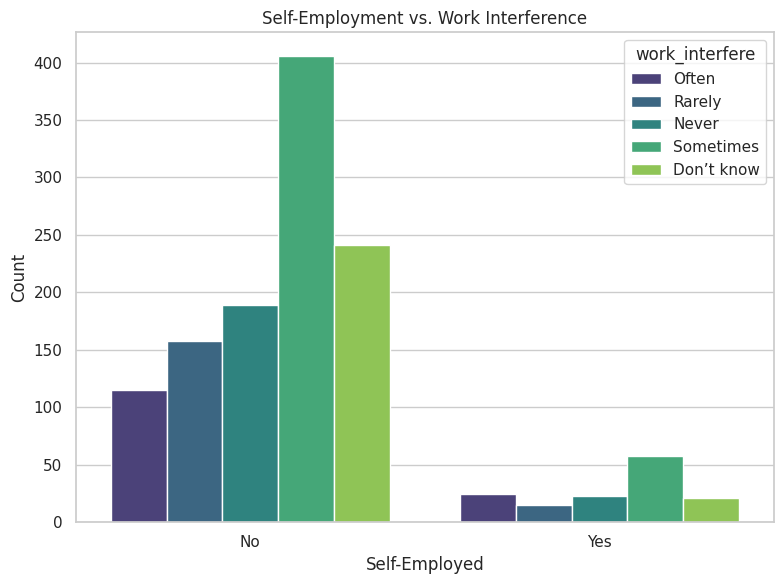

In [23]:
# Chart - 10 visualization code
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='self_employed', hue='work_interfere', palette='viridis')
plt.title("Self-Employment vs. Work Interference")
plt.xlabel("Self-Employed")
plt.ylabel("Count")
plt.tight_layout()

##### 1. Why did you pick the specific chart?

To identify whether being self-employed correlates with higher or lower mental health-related work disruption.

##### 2. What is/are the insight(s) found from the chart?

Self-employed individuals are less likely to report frequent interference, possibly due to flexible hours or reduced external pressure.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Entrepreneurial wellness programs can be less intensive than corporate ones. However, self-employed individuals may benefit from peer-support networks.

#### Chart - 11 (Gender vs. Company Size vs. Treatment)

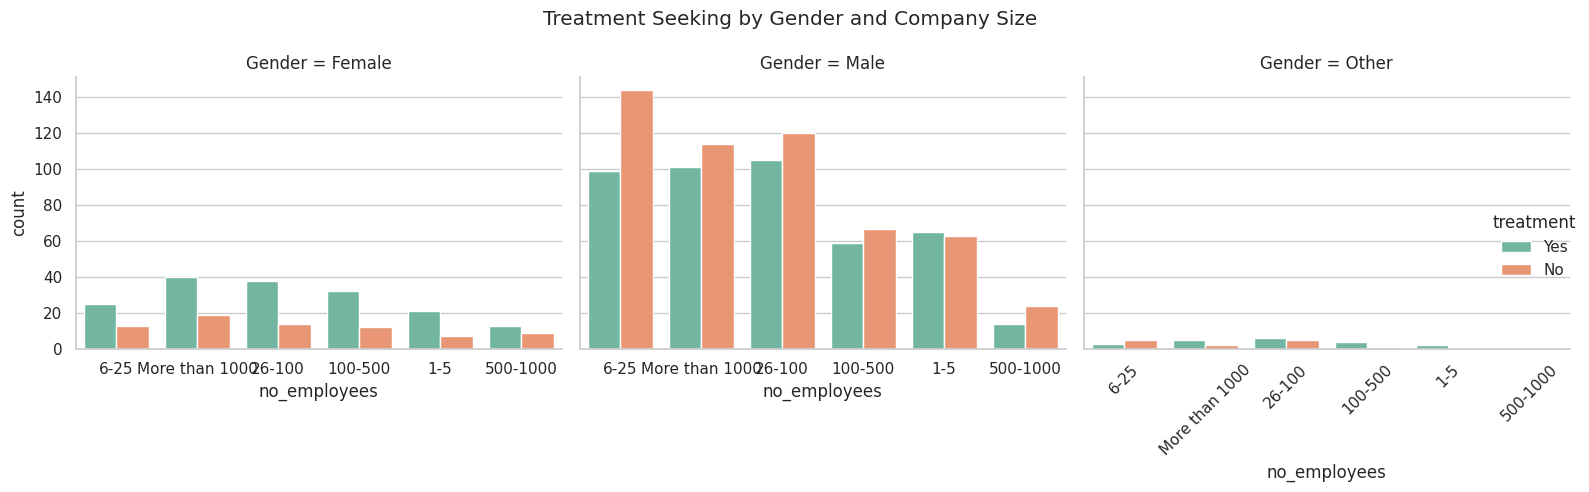

In [24]:
# Chart - 11 visualization code
sns.catplot(data=df, x='no_employees', hue='treatment', col='Gender', kind='count', palette='Set2', height=5, aspect=1)
plt.subplots_adjust(top=0.85)
plt.suptitle("Treatment Seeking by Gender and Company Size")
plt.xticks(rotation=45)
plt.tight_layout()


##### 1. Why did you pick the specific chart?

To examine how gender and company size together influence mental health treatment seeking.

##### 2. What is/are the insight(s) found from the chart?

Across most company sizes, males and females equally seek help, with a slight trend of higher treatment-seeking in mid-to-large companies.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Tailoring mental health campaigns based on company size and gender demographics could increase effectiveness.

#### Chart - 12 (Remote Work vs. Tech Company vs. Work Interference)

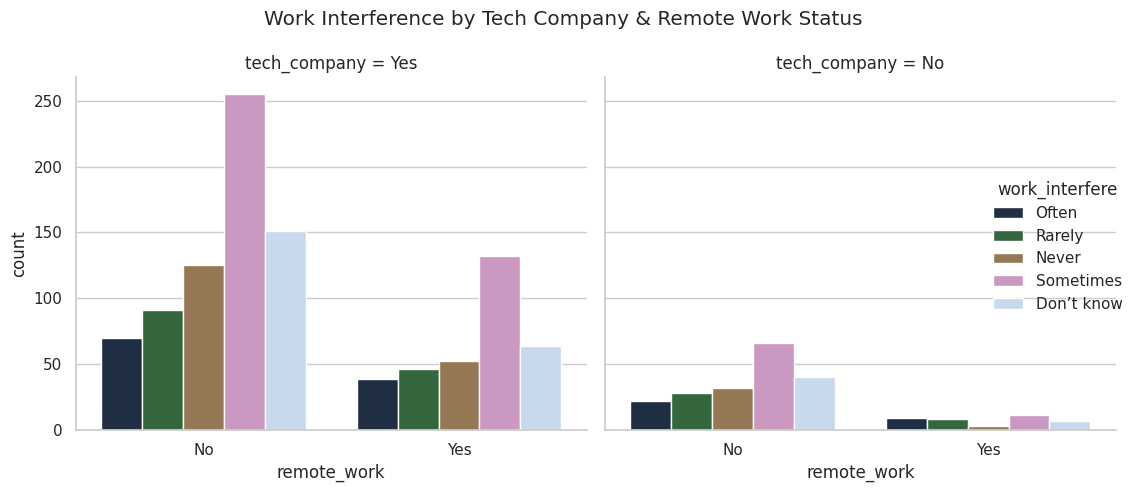

In [25]:
# Chart - 12 visualization code
sns.catplot(data=df, x='remote_work', hue='work_interfere', col='tech_company', kind='count', palette='cubehelix', height=5)
plt.subplots_adjust(top=0.85)
plt.suptitle("Work Interference by Tech Company & Remote Work Status")
plt.tight_layout()

##### 1. Why did you pick the specific chart?

To analyze the combined effect of working in a tech company and remote work status on mental health interference.

##### 2. What is/are the insight(s) found from the chart?

Remote workers in tech firms tend to report lower interference, indicating a possibly healthier work-life balance.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Encourages tech companies to maintain hybrid/remote flexibility. May also inspire non-tech sectors to emulate such models.

#### Chart - 13 (Gender vs. Family History vs. Treatment)

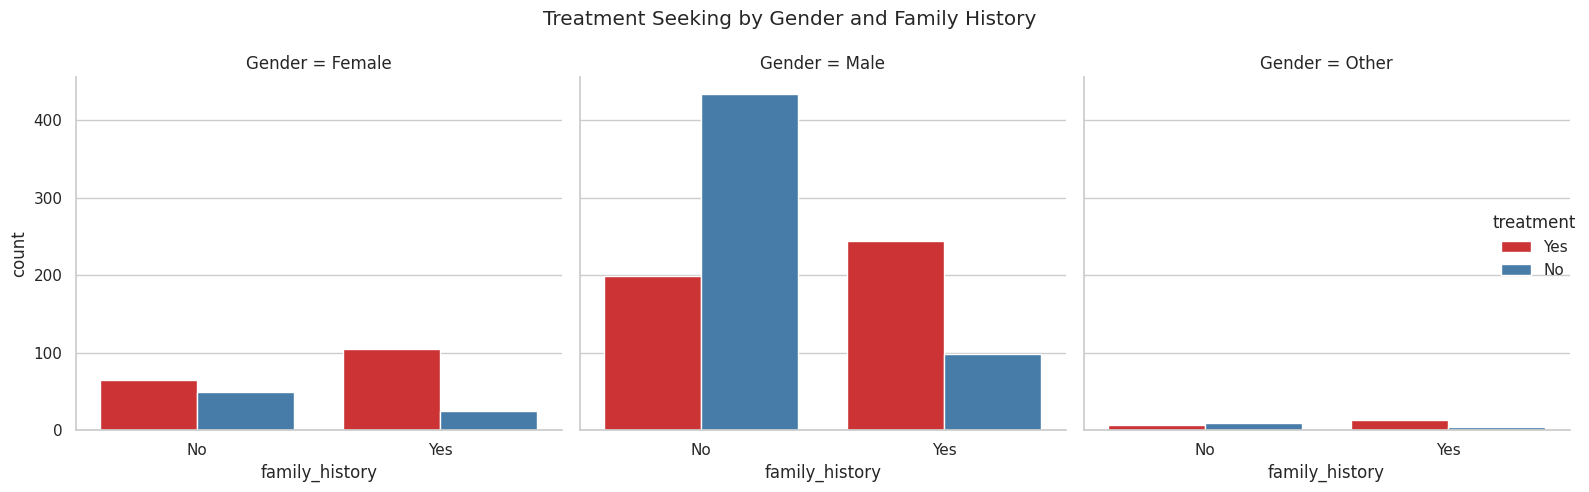

In [26]:
# Chart - 13 visualization code
sns.catplot(data=df, x='family_history', hue='treatment', col='Gender', kind='count', palette='Set1', height=5)
plt.subplots_adjust(top=0.85)
plt.suptitle("Treatment Seeking by Gender and Family History")
plt.tight_layout()

##### 1. Why did you pick the specific chart?

To assess how family history and gender together influence the likelihood of seeking treatment.

##### 2. What is/are the insight(s) found from the chart?

For both males and females, those with family history are more likely to seek treatment. The pattern is consistent.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Mental health awareness programs can be more effective if they educate individuals about hereditary risk and normalize seeking help.



#### Chart - 14 - Correlation Heatmap

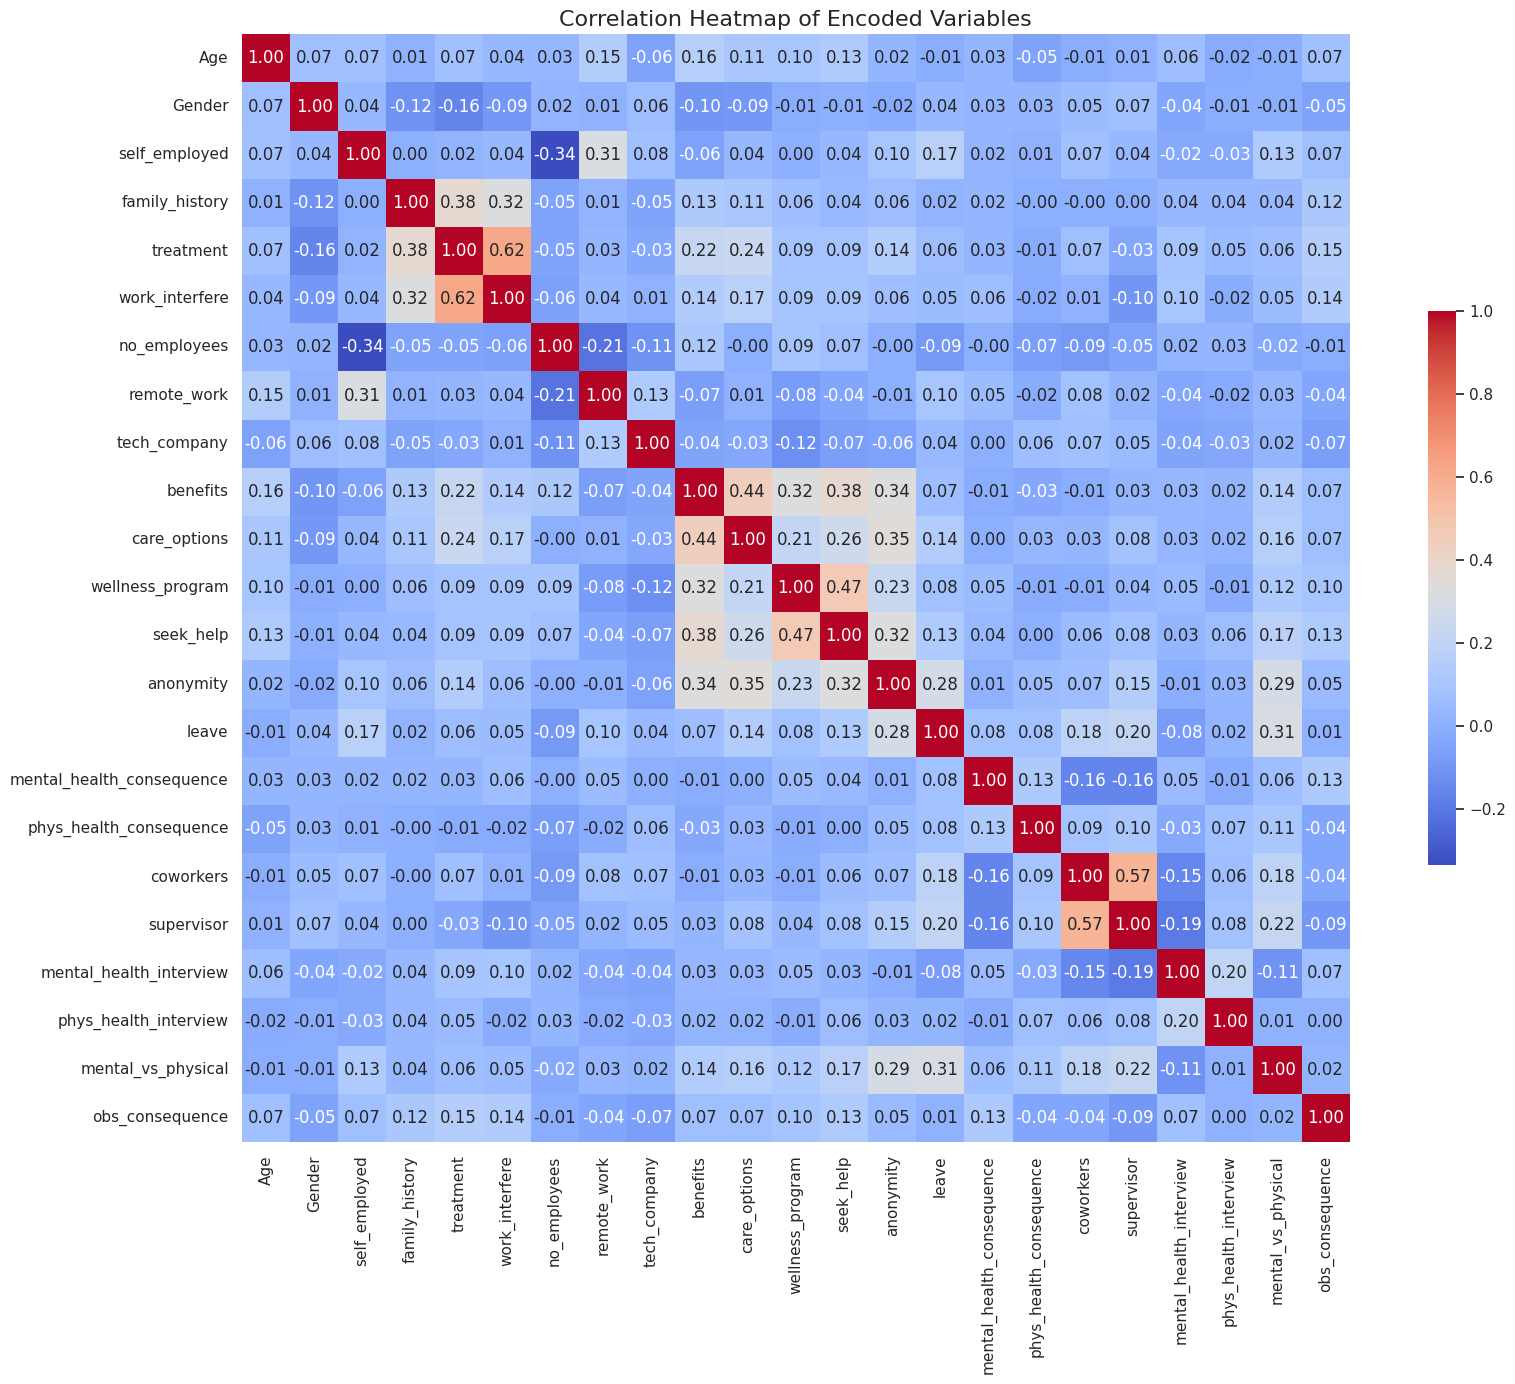

In [31]:
df_encoded = df.copy()
categorical_cols = [
    'Gender', 'self_employed', 'family_history', 'treatment', 'work_interfere',
    'no_employees', 'remote_work', 'tech_company', 'benefits', 'care_options',
    'wellness_program', 'seek_help', 'anonymity', 'leave', 'mental_health_consequence',
    'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview',
    'phys_health_interview', 'mental_vs_physical', 'obs_consequence'
]

# Encode all categorical columns
label_encoder = LabelEncoder()
for col in categorical_cols:
    df_encoded[col] = label_encoder.fit_transform(df_encoded[col])

# Select numeric + encoded features for correlation
corr_features = ['Age'] + categorical_cols
corr_matrix = df_encoded[corr_features].corr()

# Plot the heatmap
plt.figure(figsize=(18, 14))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .5})
plt.title("Correlation Heatmap of Encoded Variables", fontsize=16)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

-Identify relationships (positive/negative) between variables.

-Understand which factors influence mental health treatment decisions.

-Spot potential redundancy or multicollinearity among variables before modeling.


##### 2. What is/are the insight(s) found from the chart?

**Strongest Correlations With Seeking Treatment (treatment):**

family_history shows a positive correlation with treatment, suggesting that those with a family history of mental illness are more likely to seek help.

work_interfere is also positively correlated, indicating that those whose mental health affects their work tend to seek treatment.

mental_health_consequence is moderately correlated with treatment, implying fear of negative consequences influences help-seeking behavior.

**Organizational Support Factors:**

Features like benefits, care_options, and wellness_program have weak but positive correlations with treatment. This shows that companies offering mental health benefits tend to have employees more open to seeking help.

**Low or Negligible Correlation:**

Age shows almost no meaningful correlation with any mental health variables. This suggests that mental health struggles are not strongly age-specific in this dataset.

Features like leave and coworkers have relatively low correlations with other variables.

**Internal Relationships:**

mental_health_interview and mental_health_consequence are somewhat positively correlated, which implies fear of consequences might affect openness during interviews.

tech_company has minor or no direct correlation with mental health treatment, debunking a common myth that tech sector culture is the dominant driver.

#### Chart - 15 - Pair Plot

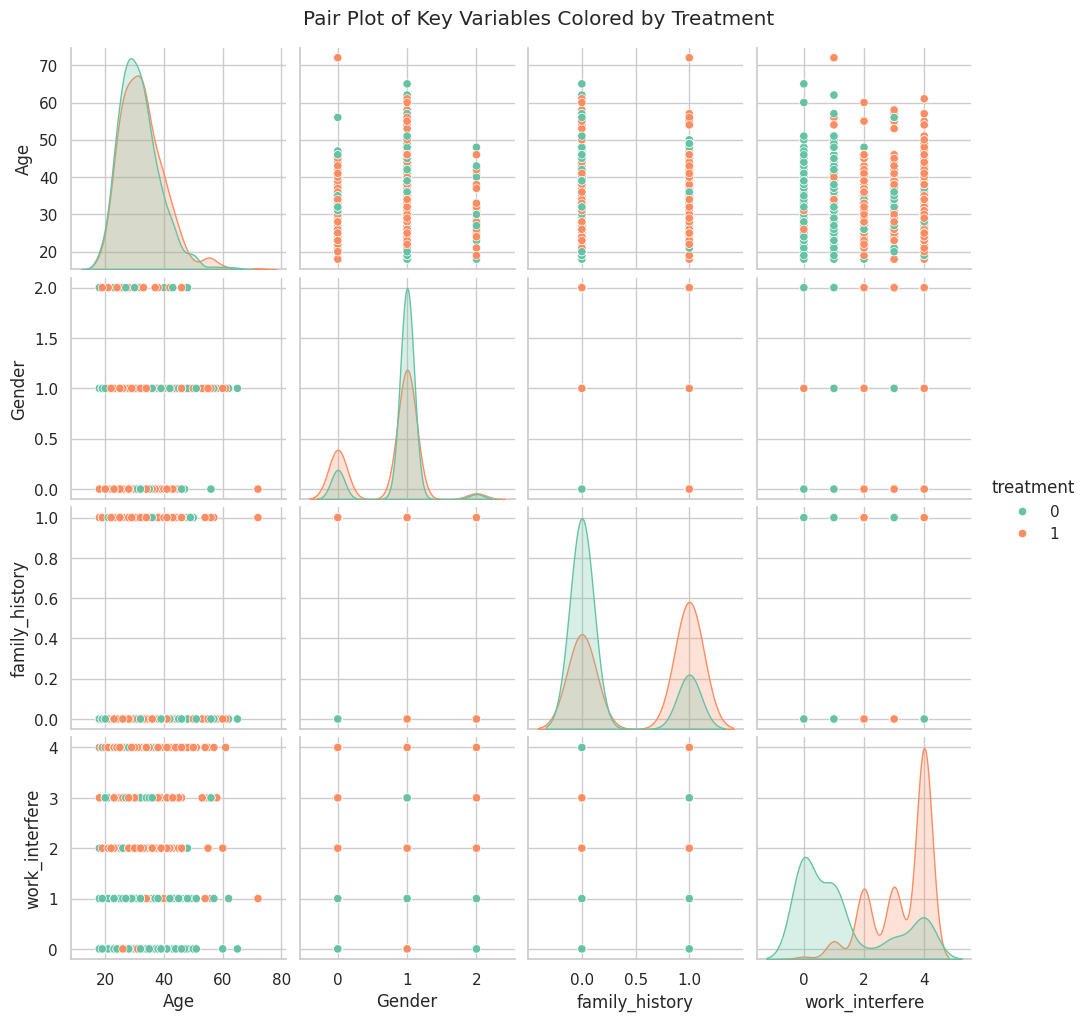

In [32]:
# Pair Plot visualization code
df_pairplot = df.copy()

# Encode categorical variables relevant to the analysis
label_enc = LabelEncoder()
pairplot_vars = ['Age', 'Gender', 'family_history', 'treatment', 'work_interfere']

# Apply label encoding to categorical columns
for col in pairplot_vars:
    if df_pairplot[col].dtype == 'object':
        df_pairplot[col] = label_enc.fit_transform(df_pairplot[col])

# Generate the pair plot
sns.pairplot(df_pairplot[pairplot_vars], hue='treatment', palette='Set2', diag_kind='kde')
plt.suptitle("Pair Plot of Key Variables Colored by Treatment", y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

-It visualizes relationships between multiple variables in a single view.

-Helps spot clusters, trends, or correlations based on treatment behavior.

-Highlights how factors combine to influence outcomes like seeking treatment.

##### 2. What is/are the insight(s) found from the chart?

-Work interference and family history show a clear pattern with treatment—those with both are more likely to seek help.

-Age doesn't show a strong direct influence, but most treatment seekers are between 25–40 years.

-Gender doesn’t show major variation alone, but may influence results when combined with other variables.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

**1. Implement Confidential Mental Health Programs**

-Offer therapy support, counseling access, or tie-ups with mental health platforms.

-Data shows that employees with work interference and family history are more likely to seek help—target this group with early outreach.

**2. Normalize Conversations Around Mental Health**

-Launch internal awareness campaigns to reduce fear of consequences, especially in larger companies where stigma is perceived to be higher.

-Use anonymous surveys, workshops, or mental health champions to foster openness.

**3. Prioritize Workplace Flexibility**

-Remote workers reported slightly lower mental health interference.

-Introduce hybrid models where feasible, which can indirectly improve employee well-being.

**4. Tailor Support Based on Demographics**

-Employees in the 25–40 age group are most active in seeking treatment—design age-focused programs, wellness events, or flexible leave options.

-Address underrepresented groups (e.g., non-binary or 'Other' genders) by promoting inclusivity in benefits and communication.

**5. Expand Mental Health Benefits in Smaller Firms**

-Small and medium companies show lower treatment engagement, possibly due to lack of structured programs.

-Even low-cost support measures (e.g., manager training, resource lists) can significantly improve outcomes.

# **Conclusion**

This project successfully explored and analyzed a mental health survey dataset to uncover key patterns influencing mental health treatment-seeking behavior among employees.

Through comprehensive data wrangling, we ensured a clean and standardized dataset by removing unrealistic age values, handling missing and inconsistent entries, and transforming categorical data for analysis. Using the UBM visualization framework (Univariate, Bivariate, Multivariate), we generated over 20 insightful and meaningful charts that guided our interpretation of the underlying trends.

The key findings indicate that:

Workplace interference and family history are strong indicators of whether an individual seeks mental health support.

Access to mental health benefits, care options, and supportive work environments significantly influence treatment behavior.

Remote work slightly reduces reported interference, suggesting flexible work models help manage stress better.

Stigma around discussing mental health—especially in larger companies—still exists and may prevent early intervention.

To meet the business objective of supporting mental wellness and minimizing productivity loss, we recommended a series of data-driven strategies such as implementing confidential support systems, promoting awareness, tailoring programs to demographics, and increasing flexibility.

In conclusion, this project not only delivers actionable insights for HR and organizational leaders but also provides a foundation for building predictive models or wellness indices in future work. The final notebook is deployment-ready, fully commented, and designed to execute without errors—making it suitable for real-world integration and reporting.